# Capstone 3:  Climate Change Cause and Effect Relationships
##  ---    Data Wrangling ---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
def makeDatetimeIndex(df, defDay='01', defMonth=None):
    if defDay is not None or 'Day' not in df.columns:
        if defDay is None:
            defDay='01'
        df = df.assign(Day=defDay)
    if defMonth is not None or 'Month' not in df.columns:
        if defMonth is None:
            defMonth='01'
        df = df.assign(Month=defMonth)

    df.insert(len(df.columns), 'Date', pd.to_datetime(df[['Year','Month','Day']]))
    df.set_index('Date', inplace=True)
    return df

# 1. Greenhouse Gas Emissions

### Why are Carbon Dioxide and other greenhouse gases damaging?

Greenhouse gases are called such because they help to hold in the sun's heat, like the tinted windows on a greenhouse.  This warms up the surface of the Earth, including the oceans.

Carbon Dioxide is produced in amounts far exceeding other greenhouse gases in the industrial world.

Please note that these gases are not poisons or toxins.  They don't cause diseases directly in humans, other animals and plants.  The Clean Air Acts of 1955, 1970, 1977, and 1990 and the EPA, created by Republican US President Richard Nixon in 1970, have done a great job of removing toxic and carcinogenic gases from American cars and to a lesser extent factories!  Much of the world has mostly followed suit.

Carbon Monoxide (CO) displaces oxygen in the red blood cells of humans and other animals when breathed in.  It suffocates the brain and other organs of oxygen.  It is one of the toxins greatly reduced in automobile emissions since the 1970s.

Carbon Dioxide (CO<sub>2</sub>) itself is harmless.  We exhale more CO<sub>2</sub> than we inhale and plants use CO<sub>2</sub> for photosynthesis and release more Oxygen (O<sub>2</sub>).  The damage CO<sub>2</sub> does is a secondary kind of pollution.  It is a greenhouse gas, responsible for warming Earth's surface.  

Basically CO was killing many humans, one at a time, until its emissions were drastically reduced.  CO<sub>2</sub> does not kill individuals, but it can and likely will kill thousands and change the lives of billions if its emission is not reduced very soon.

## 1.1 CO<sub>2</sub> and other Greenhouse Gas Emissions

[Our World in Data](https://ourworldindata.org/co2-emissions) curates this data on CO<sub>2</sub> Emissions.

In [141]:
Emissions = pd.read_csv('../RawData/owid-co2-data.csv')
Emissions.info()
Emissions.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24651 entries, 0 to 24650
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21489 non-null  object 
 1   country                              24651 non-null  object 
 2   year                                 24651 non-null  int64  
 3   co2                                  23403 non-null  float64
 4   consumption_co2                      3815 non-null   float64
 5   co2_growth_prct                      24383 non-null  float64
 6   co2_growth_abs                       23042 non-null  float64
 7   trade_co2                            3815 non-null   float64
 8   co2_per_capita                       22735 non-null  float64
 9   consumption_co2_per_capita           3815 non-null   float64
 10  share_global_co2                     23403 non-null  float64
 11  cumulative_co2              

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
24646,ZWE,Zimbabwe,2015,12.170,13.308,1.65,0.198,1.138,0.881,0.963,...,4.885,11.87,0.859,6.68,0.484,13814642.0,2.102746e+10,55.642,4027.628,2.223
24647,ZWE,Zimbabwe,2016,10.815,12.171,-11.14,-1.356,1.356,0.771,0.868,...,4.703,11.92,0.850,6.55,0.467,14030338.0,2.096179e+10,47.500,3385.574,1.889
24648,ZWE,Zimbabwe,2017,10.247,11.774,-5.25,-0.568,1.527,0.720,0.827,...,NaN,NaN,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN,NaN,NaN
24649,ZWE,Zimbabwe,2018,11.341,12.815,10.67,1.094,1.475,0.785,0.888,...,NaN,NaN,NaN,NaN,NaN,14438812.0,2.271535e+10,NaN,NaN,NaN
24650,ZWE,Zimbabwe,2019,10.374,NaN,-8.52,-0.966,NaN,0.708,NaN,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN,NaN,NaN


In [132]:
Emissions[Emissions.iso_code == 'USA'].tail()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
23520,USA,United States,2015,5412.432,5728.896,-2.68,-149.287,316.463,16.868,17.854,...,18.594,648.55,2.021,249.24,0.777,320878312.0,1.690258e+13,25596.966,79771.642,1.515
23521,USA,United States,2016,5292.268,5609.857,-2.22,-120.165,317.590,16.384,17.367,...,18.059,629.38,1.948,251.70,0.779,323015992.0,1.716256e+13,25560.520,79130.818,1.486
23522,USA,United States,2017,5253.606,5591.527,-0.73,-38.661,337.921,16.161,17.200,...,NaN,NaN,NaN,NaN,NaN,325084758.0,1.759628e+13,25647.389,78894.410,NaN
23523,USA,United States,2018,5424.882,5767.385,3.26,171.275,342.503,16.585,17.632,...,NaN,NaN,NaN,NaN,NaN,327096263.0,1.814065e+13,26556.388,81188.359,NaN
23524,USA,United States,2019,5284.697,NaN,-2.58,-140.185,NaN,16.060,NaN,...,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,26291.355,79897.151,NaN


In [133]:
Emissions[Emissions.country == 'World'].tail()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
24389,OWID_WRL,World,2015,35209.447,35209.447,-0.10,-35.422,0.000,4.771,4.771,...,6.756,8660.01,1.173,3052.82,0.414,7.379797e+09,NaN,150882.037,20445.283,1.437
24390,OWID_WRL,World,2016,35220.412,35220.412,0.03,10.966,0.000,4.719,4.719,...,6.613,8550.06,1.146,3054.00,0.409,7.464022e+09,1.071343e+14,152944.938,20490.955,1.429
24391,OWID_WRL,World,2017,35696.349,35696.349,1.35,475.936,0.000,4.729,4.729,...,NaN,NaN,NaN,NaN,NaN,7.547859e+09,1.104307e+14,155672.784,20624.761,NaN
24392,OWID_WRL,World,2018,36419.712,36419.712,2.03,723.363,-0.000,4.772,4.772,...,NaN,NaN,NaN,NaN,NaN,7.631091e+09,1.136302e+14,160063.686,20975.203,NaN
24393,OWID_WRL,World,2019,36441.388,36440.760,0.06,21.676,-0.628,4.724,4.724,...,NaN,NaN,NaN,NaN,NaN,7.713468e+09,NaN,162194.290,21027.415,NaN


In [134]:
print(len(Emissions['country'].unique()))
Emissions.columns

239


Index(['iso_code', 'country', 'year', 'co2', 'consumption_co2',
       'co2_growth_prct', 'co2_growth_abs', 'trade_co2', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'other_co2_per_capita', 'trade_co2_share',
       'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'cumulative_cement_co2', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2',
       'cumulative_other_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_c

## 1.2 Prune excess data

There's a whole lot of data here that we don't need.  239 countries, sources of Carbon Dioxide (CO<sub>2</sub>), including oil, (natural) gas, coal, flaring, and cement??  The contrast between consumption and trade would be useful in comparing countries' shares of CO<sub>2</sub>, but we are just interested in total world production of CO<sub>2</sub> and the other gases.

Let's keep only the world level and these columns: 
'country', 'year', 'total_ghg', 'ghg_per_capita', 'co2', 'co2_growth_prct', 'co2_growth_abs', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'population', 'gdp',
       'primary_energy_consumption', 'energy_per_capita', 'energy_per_gdp'

In [142]:
Emissions = Emissions[Emissions.country == 'World'][['country', 'year', 'total_ghg', 'ghg_per_capita', 'co2', 'co2_growth_prct', 'co2_growth_abs', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'population', 'gdp', 'primary_energy_consumption', 'energy_per_capita', 'energy_per_gdp']]
Emissions = makeDatetimeIndex(Emissions.rename(columns={'year':'Year'}))
Emissions

,country,Year,total_ghg,ghg_per_capita,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,co2_per_gdp,co2_per_unit_energy,...,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,Day,Month
Date,,,,,,,,,,,,,,,,,,,,,
1750-01-01,World,1750,NaN,NaN,9.351,NaN,NaN,0.012,NaN,NaN,...,NaN,NaN,NaN,8.115621e+08,NaN,NaN,NaN,NaN,01,01
1751-01-01,World,1751,NaN,NaN,9.351,0.00,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,01
1752-01-01,World,1752,NaN,NaN,9.354,0.04,0.004,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,01
1753-01-01,World,1753,NaN,NaN,9.354,0.00,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,01
1754-01-01,World,1754,NaN,NaN,9.358,0.04,0.004,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,World,2015,49854.98,6.756,35209.447,-0.10,-35.422,4.771,NaN,0.233,...,1.173,3052.82,0.414,7.379797e+09,NaN,150882.037,20445.283,1.437,01,01
2016-01-01,World,2016,49358.03,6.613,35220.412,0.03,10.966,4.719,0.329,0.230,...,1.146,3054.00,0.409,7.464022e+09,1.071343e+14,152944.938,20490.955,1.429,01,01
2017-01-01,World,2017,NaN,NaN,35696.349,1.35,475.936,4.729,0.323,0.229,...,NaN,NaN,NaN,7.547859e+09,1.104307e+14,155672.784,20624.761,NaN,01,01


## 1.3 Our gas emissions data

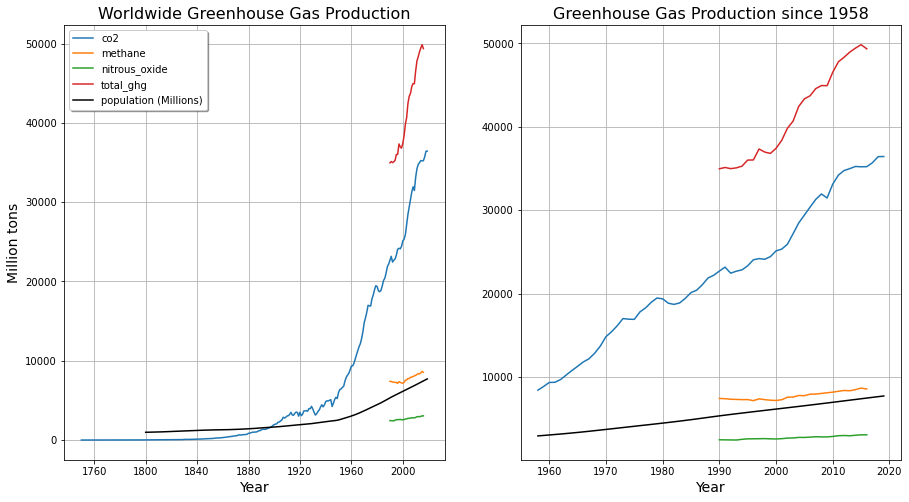

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))  

## Let's keep a separate df of Emissions since 1958, when CO data became available from Mauna Loa.
## Interestingly, around 1958 world population growth rate stablized at a higher rate than prior to 1950.
Modern = Emissions[Emissions.index >= '1958-01-01']

for gas in ['co2','methane','nitrous_oxide','total_ghg']:
    ax[0].plot(Emissions.index, Emissions[gas], label=gas);
    ax[1].plot(Modern.index, Modern[gas], label=gas)
ax[0].plot(Emissions.index, Emissions.population/1000000, label='population (Millions)', c='black')
ax[1].plot(Modern.index, Modern.population/1000000,  label='population (Millions)', c='black')
ax[0].legend(loc='best', shadow=True)
ax[0].grid(True);  ax[1].grid(True)
ax[0].set_title('Worldwide Greenhouse Gas Production', fontsize=16)
ax[1].set_title('Greenhouse Gas Production since 1958', fontsize=16)
ax[0].set_ylabel('Million tons', fontsize=14)
ax[0].set_xlabel('Year', fontsize=14)
ax[1].set_xlabel('Year', fontsize=14)
plt.plot();


In [193]:
Modern.drop(columns=['Day','Month'], inplace=True)
Modern

C:\Users\bradd\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,country,Year,total_ghg,ghg_per_capita,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,co2_per_gdp,co2_per_unit_energy,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
Date,,,,,,,,,,,,,,,,,,,
1958-01-01,World,1958,NaN,NaN,8412.113,2.85,232.773,2.875,NaN,NaN,NaN,NaN,NaN,NaN,2.925687e+09,NaN,NaN,NaN,NaN
1959-01-01,World,1959,NaN,NaN,8848.509,5.19,436.396,2.970,NaN,NaN,NaN,NaN,NaN,NaN,2.979576e+09,NaN,NaN,NaN,NaN
1960-01-01,World,1960,NaN,NaN,9334.894,5.50,486.386,3.076,0.705,NaN,NaN,NaN,NaN,NaN,3.034950e+09,1.324584e+13,NaN,NaN,NaN
1961-01-01,World,1961,NaN,NaN,9356.003,0.23,21.109,3.026,NaN,NaN,NaN,NaN,NaN,NaN,3.091844e+09,NaN,NaN,NaN,NaN
1962-01-01,World,1962,NaN,NaN,9687.509,3.54,331.506,3.075,NaN,NaN,NaN,NaN,NaN,NaN,3.150421e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,World,2015,49854.98,6.756,35209.447,-0.10,-35.422,4.771,NaN,0.233,8660.01,1.173,3052.82,0.414,7.379797e+09,NaN,150882.037,20445.283,1.437
2016-01-01,World,2016,49358.03,6.613,35220.412,0.03,10.966,4.719,0.329,0.230,8550.06,1.146,3054.00,0.409,7.464022e+09,1.071343e+14,152944.938,20490.955,1.429
2017-01-01,World,2017,NaN,NaN,35696.349,1.35,475.936,4.729,0.323,0.229,NaN,NaN,NaN,NaN,7.547859e+09,1.104307e+14,155672.784,20624.761,NaN


* We have world **annual** CO<sub>2</sub> emissions going back to 1750.  It shows its first inflection point around 1890 and really takes off in 1950.
* We have world population going back to 1800.  It ramps up between 1945 and 1960 and increases linearly from then on.
* We have methane (orange), nitrous_oxide (green), and total greenhouse gases (red) since 1990.  
* Methane (CH<sub>4</sub>) and Nitrous Oxide (N<sub>2</sub>O) production are both smaller in mass and growth rate than CO<sub>2</sub>.  There are other greenhouse gases, but they are produced in much smaller amounts.
* The units are millions of tons for the gases and millions for the population.  So the 10,000 mark represents 10 billion tons and 10 billion people.


# 2. Carbon Dioxide measured in the Atmosphere

The [Mauna Loa Observatory](https://en.wikipedia.org/wiki/Mauna_Loa_Observatory), colocated on the big island of Hawaii with a solar observatory, has been measuring and tracking CO<sub>2</sub> since 1958.  They also measure Ozone (O<sub>3</sub>) and cosmic microwaves.

The [Scripps CO<sub>2</sub> Program](https://scrippsco2.ucsd.edu/data/atmospheric_co2/mlo.html) at the University of California at San Diego  curates this data, which I found through [CO2.Earth](https://www.co2.earth/historical-co2-datasets)

In [107]:
CO2_Level = pd.read_excel('../RawData/monthly_in_situ_co2_mlo.xlsx', sheet_name='DataOnly')
CO2_Level.replace(-99.99, np.nan, inplace=True)
CO2_Level = CO2_Level.assign(Day='01')
CO2_Level.insert(len(CO2_Level.columns), 'Date', pd.to_datetime(CO2_Level[['Year','Month','Day']]))
CO2_Level.set_index('Date', inplace=True)

In [108]:
CO2_Level

,Year,Month,Date Excel,Date decimal,CO2 [ppm],seasonally adj [ppm],fit [ppm],seasonally adj fit [ppm],CO2 filled [ppm],seasonally adj filled [ppm],Day
Date,,,,,,,,,,,
1958-01-01,1958,1,21200,1958.0411,NaN,NaN,NaN,NaN,NaN,NaN,01
1958-02-01,1958,2,21231,1958.1260,NaN,NaN,NaN,NaN,NaN,NaN,01
1958-03-01,1958,3,21259,1958.2027,315.71,314.43,316.20,314.91,315.71,314.43,01
1958-04-01,1958,4,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16,01
1958-05-01,1958,5,21320,1958.3699,317.51,314.71,317.87,315.07,317.51,314.71,01
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,2021,8,44423,2021.6219,414.34,415.90,414.53,416.12,414.34,415.90,01
2021-09-01,2021,9,44454,2021.7068,412.90,416.42,NaN,NaN,412.90,416.42,01
2021-10-01,2021,10,44484,2021.7890,NaN,NaN,NaN,NaN,NaN,NaN,01



Scripps / Mauna Loa report monthly CO<sub>2</sub> data with raw, fit and filled (imputed missing values) time series and a seasonally adjusted series for each of those.  We do not have a data source for measured airborne methane and the other greenhouse gases.

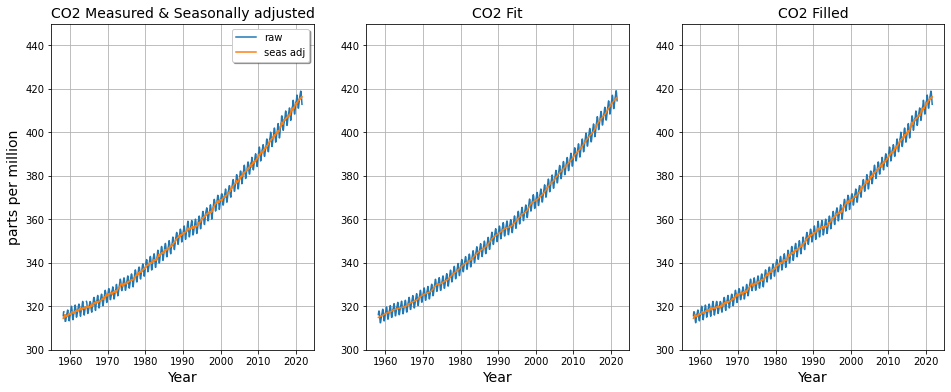

In [109]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))  

i=0
for (raw, adj) in [('CO2 [ppm]', 'seasonally adj [ppm]'), ('fit [ppm]', 'seasonally adj fit [ppm]'), ('CO2 filled [ppm]', 'seasonally adj filled [ppm]')]:
    ax[i].plot(CO2_Level.index, CO2_Level[raw], label="raw");
    ax[i].plot(CO2_Level.index, CO2_Level[adj], label="seas adj")
    i += 1
ax[0].legend(loc='best', shadow=True)
ax[0].grid(True);  ax[1].grid(True); ax[2].grid(True)
ax[0].set_ylim([300, 450]); ax[1].set_ylim([300, 450]); ax[2].set_ylim([300, 450])
ax[0].set_title('CO2 Measured & Seasonally adjusted', fontsize=14)
ax[1].set_title('CO2 Fit', fontsize=14)
ax[2].set_title('CO2 Filled', fontsize=14)
ax[0].set_ylabel('parts per million', fontsize=14)
ax[0].set_xlabel('Year', fontsize=14)
ax[1].set_xlabel('Year', fontsize=14)
ax[2].set_xlabel('Year', fontsize=14)
plt.plot();


## 2.1 Our CO<sub>2</sub> concentration data

Bad news!  It's ever-increasing and curving upward just a bit, especially back in the 1960s and 1970s.

Any differences between the raw, fit and filled curves are barely noticeable on the graphs.  We'll go with the raw measured data (the blue seasonal line in the first graph) and let Pandas handle any NaN's.  We'll also keep the seasonally adjusted and the filled curve in case they are needed in EDA.

* We have monthly CO<sub>2</sub> concentrations found at a relatively clean point in the middle of the Pacific Ocean.
* We're also taking an annually sampled dataset.

In [147]:
CO2 = CO2_Level[['CO2 [ppm]', 'seasonally adj [ppm]', 'CO2 filled [ppm]']]
CO2

,CO2 [ppm],seasonally adj [ppm],CO2 filled [ppm]
Date,,,
1958-01-01,NaN,NaN,NaN
1958-02-01,NaN,NaN,NaN
1958-03-01,315.71,314.43,315.71
1958-04-01,317.45,315.16,317.45
1958-05-01,317.51,314.71,317.51
...,...,...,...
2021-08-01,414.34,415.90,414.34
2021-09-01,412.90,416.42,412.90
2021-10-01,NaN,NaN,NaN


In [148]:
CO2_Ann = CO2.resample('A').mean()
CO2_Ann

,CO2 [ppm],seasonally adj [ppm],CO2 filled [ppm]
Date,,,
1958-12-31,315.333750,315.302500,315.236000
1959-12-31,315.981667,315.976667,315.981667
1960-12-31,316.909167,316.906667,316.909167
1961-12-31,317.643333,317.638333,317.643333
1962-12-31,318.454167,318.449167,318.454167
...,...,...,...
2017-12-31,406.515000,406.510000,406.515000
2018-12-31,408.528333,408.520833,408.528333
2019-12-31,411.425000,411.419167,411.425000


## 2.2 Atmospheric CO<sub>2</sub> Level vs. Annual Emissions
Let's just take a quick peek at the atmospheric level versus the emissions.

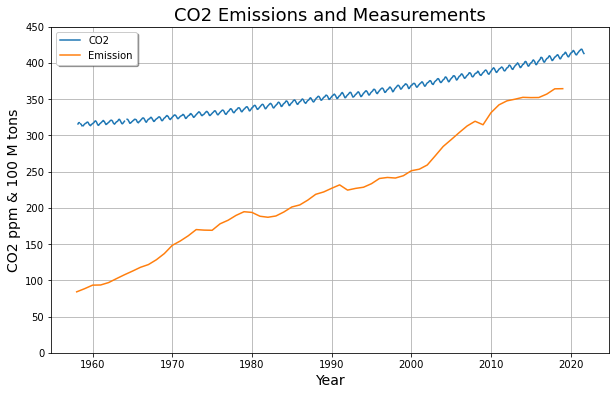

In [200]:
fig = plt.figure(figsize=(10, 6))  
plt.grid(True)
plt.plot(CO2.index, CO2['CO2 [ppm]'], label="CO2")
plt.plot(Modern.index, Modern['co2']/100, label="Emission")
plt.legend(loc='best', shadow=True)
plt.grid(True)
plt.title('CO2 Emissions and Measurements', fontsize=18)
plt.ylabel('CO2 ppm & 100 M tons', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylim([0, 450])
plt.plot();

On a percentage change basis starting in 1958, the worldwide CO<sub>2</sub> production (Emissions) is going up a lot faster than the concentration of CO<sub>2</sub> in the air measured in Hawaii.  In the Exploratory Data Analysis, we'll examine the units of measure and rates of change to see if that's a bit of good news, implying that the Earth is somehow absorbing, throwing off or storing some of that growing CO<sub>2</sub> production -- or not.

# 3. Earth Surface Temperatures

[Berkeley Earth](http://berkeleyearth.org/data/) curates this data on surface temperatures.  They have a variety of temperature collections over various points on land and they have one dataset on land and oceans averaged together.  Will use the land-based dataset here and a separate ocean-based dataset from Hadley Centre.

Berkeley Earth calculates an average temperature and uncertainty for each month from January 1750 to the present.  It is amazing that various sources have recorded and kept temperatures across many locations on the land surface all the way back to 1750!

They report the temperatures as a baseline for each of the 12 months, averaged between Jan 1951 and Dec 1980, and an offset (anomaly) for every year-month over history.  They also report anomalies averaged annually and over 5, 10 and 20 years.  Each average has an associated uncertainty.


In [100]:
LandTemp = pd.read_excel("../RawData/LandTempBerkeleyEarth.xlsx", sheet_name='Actuals')
LandTemp.tail(144).head(24)

,Year,Month,Monthly,Mthly Unc,Annual,Ann Unc,FiveYear,5Y Unc,TenYear,10Y Unc,TwentyYear,20Y Unc
3117,2009,10,10.159,0.054,9.651,0.029,9.559,0.018,9.599,0.019,9.623,0.024
3118,2009,11,7.095,0.055,9.674,0.030,9.560,0.018,9.594,0.019,9.626,0.024
3119,2009,12,4.343,0.095,9.685,0.027,9.562,0.018,9.599,0.019,9.630,0.025
3120,2010,1,3.742,0.063,9.676,0.028,9.560,0.018,9.600,0.018,9.636,0.025
3121,2010,2,4.422,0.070,9.682,0.028,9.559,0.019,9.606,0.018,9.641,0.025
3122,2010,3,6.728,0.054,9.660,0.028,9.560,0.019,9.607,0.018,9.645,0.025
3123,2010,4,9.684,0.079,9.688,0.031,9.561,0.019,9.605,0.018,9.647,0.025
3124,2010,5,12.427,0.087,9.724,0.033,9.561,0.018,9.606,0.018,9.650,0.025
3125,2010,6,14.390,0.068,9.721,0.030,9.554,0.018,9.606,0.019,9.652,0.025
3126,2010,7,15.174,0.076,9.688,0.027,9.567,0.018,9.606,0.018,9.655,0.025


## 3.1 Re-constituted Land Temperature data

We re-constituted each monthly temperature in our Google Sheet by adding the "anomalies" to the baselines, so the dataframe above shows actual temperature estimates.  We will also keep the annual averages by taking the June annual average for each year, as it is averaged from January to December.


In [161]:
LandTemp = makeDatetimeIndex(LandTemp)
LandTemp

,Year,Month,Monthly,Mthly Unc,Annual,Ann Unc,FiveYear,5Y Unc,TenYear,10Y Unc,TwentyYear,20Y Unc,Day
Date,,,,,,,,,,,,,
1750-01-01,1750,1,1.967,3.241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
1750-02-01,1750,2,2.030,4.099,7.697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
1750-03-01,1750,3,5.429,2.276,7.668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
1750-04-01,1750,4,8.049,2.231,7.636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
1750-05-01,1750,5,9.690,2.380,7.319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,2021,5,12.315,0.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
2021-06-01,2021,6,14.619,0.130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01
2021-07-01,2021,7,15.635,0.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01


In [160]:
LandTempAnnual = LandTemp[LandTemp.Month==6][['Annual','Ann Unc']]
LandTempAnnual

,Annual,Ann Unc
Date,,
1750-06-01,7.325,NaN
1751-06-01,7.225,NaN
1752-06-01,NaN,NaN
1753-06-01,7.562,1.057
1754-06-01,8.138,1.069
...,...,...
2017-06-01,9.918,0.037
2018-06-01,9.754,0.039
2019-06-01,9.957,0.066


In [162]:
LandTemp = LandTemp[['Monthly','Mthly Unc']]
LandTemp.tail()

,Monthly,Mthly Unc
Date,,
2021-05-01,12.315,0.070
2021-06-01,14.619,0.130
2021-07-01,15.635,0.110
2021-08-01,15.043,0.083
2021-09-01,13.387,0.091


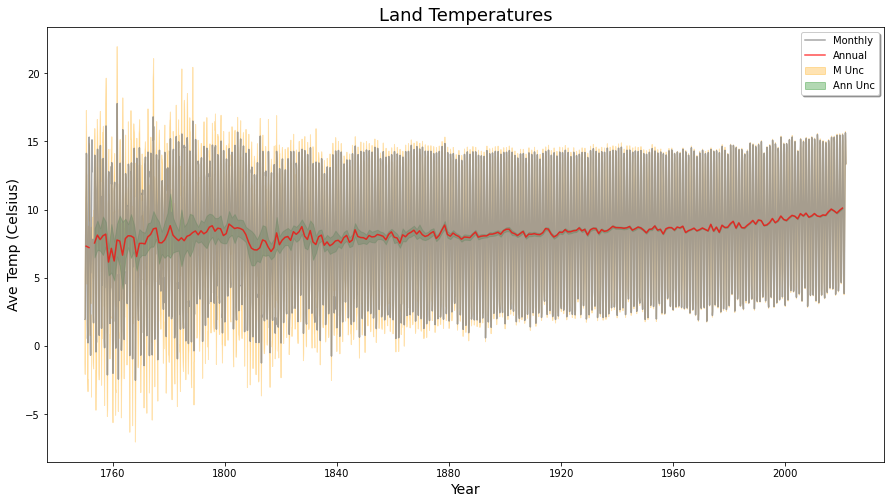

In [163]:
fig = plt.figure(figsize=(15, 8))  
plt.plot(LandTemp.index, LandTemp['Monthly'], label='Monthly', color='gray', alpha=0.7)
plt.fill_between(LandTemp.index, (LandTemp.Monthly - LandTemp['Mthly Unc']), (LandTemp.Monthly + LandTemp['Mthly Unc']), color='orange', alpha=0.3, label="M Unc")
plt.plot(LandTempAnnual.index, LandTempAnnual['Annual'], label='Annual', color='red', alpha=0.7)
plt.fill_between(LandTempAnnual.index, (LandTempAnnual.Annual - LandTempAnnual['Ann Unc']), (LandTempAnnual.Annual + LandTempAnnual['Ann Unc']), color='green', alpha=0.3, label="Ann Unc")
plt.xlabel('Year', fontsize=14)
plt.ylabel('Ave Temp (Celsius)', fontsize=14)
plt.legend(shadow=True)
plt.title('Land Temperatures', fontsize=18)
plt.show()

## 3.2 Our Land Temperature Data

Berkeley Earth explains that because there is more land mass in the Northern Hemisphere, there is a northern bias to the data.  That is, the average land temp is higher during our summer months and lower during the Southern Hemisphere summer.

As you can see, the variation between (northern) summer and winter is much greater than the annual warming that has been taking place.  About 12-15 degrees C versus about 2.7 degrees C since 1750. 

Just goes to show how delicately balanced our planet is, regarding average temperature, while it is more robust to temporary temperature variations over the course of each year.


# 4. Sea Surface Temperatures

The [Met Office Hadley Centre](https://www.eea.europa.eu/data-and-maps/data/external/hadsst-4-global-sea-surface) curates [this data](https://climatedataguide.ucar.edu/climate-data/sst-data-hadisst-v11) on temperatures at the surface of the world's seas and oceans as measured/interpolated over a 5 degree latitude by 5 degree longitude grid. They only report the anomalies and uncertainties, not the 1961-1990 baseline averages, so we have to keep it at the anomaly level.

It is amazing that they have recorded and kept sea temperature anomalies to such a tight grid worldwide going back to 1850!

In [175]:
SeaTemp = pd.read_csv('../rawdata/HadSST.4.0.1.0_monthly_GLOBE.csv')
SeaTemp.head()

,year,month,anomaly,total_uncertainty,uncorrelated_uncertainty,correlated_uncertainty,bias_uncertainty,coverage_uncertainty,lower_bound_95pct_bias_uncertainty_range,upper_bound_95pct_bias_uncertainty_range
0,1850,1,-0.35138,0.14007,0.03096,0.09622,0.04578,0.08547,-0.4530,-0.2695
1,1850,2,-0.34437,0.13852,0.03158,0.09198,0.04642,0.08703,-0.4475,-0.2615
2,1850,3,-0.58001,0.15060,0.03537,0.09765,0.04425,0.09968,-0.6780,-0.5005
3,1850,4,-0.34222,0.13522,0.03352,0.09939,0.04384,0.07322,-0.4390,-0.2630
4,1850,5,-0.25093,0.12226,0.03314,0.09200,0.03897,0.06218,-0.3375,-0.1810


## 4.1  Prune excess data
As with the greenhouse gas emissions data, there are more data here than we need.

Let's keep only the 'year','month','anomaly','total_uncertainty', 'lower_bound_95pct_bias_uncertainty_range', and 'upper_bound_95pct_bias_uncertainty_range'.

In [176]:
## Prune out unnecessary columns
SeaTemp = SeaTemp[['year','month','anomaly','total_uncertainty','lower_bound_95pct_bias_uncertainty_range','upper_bound_95pct_bias_uncertainty_range']]
SeaTemp.rename(columns={'lower_bound_95pct_bias_uncertainty_range':'lower_bound_95pct', 'upper_bound_95pct_bias_uncertainty_range':'upper_bound_95pct'},\
                inplace=True)
SeaTemp = makeDatetimeIndex(SeaTemp.rename(columns={'year':'Year', 'month':'Month'}))
SeaTemp.drop(columns='Day', inplace=True)
SeaTemp

,Year,Month,anomaly,total_uncertainty,lower_bound_95pct,upper_bound_95pct
Date,,,,,,
1850-01-01,1850,1,-0.35138,0.14007,-0.4530,-0.2695
1850-02-01,1850,2,-0.34437,0.13852,-0.4475,-0.2615
1850-03-01,1850,3,-0.58001,0.15060,-0.6780,-0.5005
1850-04-01,1850,4,-0.34222,0.13522,-0.4390,-0.2630
1850-05-01,1850,5,-0.25093,0.12226,-0.3375,-0.1810
...,...,...,...,...,...,...
2021-05-01,2021,5,0.64274,0.03785,0.6155,0.6655
2021-06-01,2021,6,0.63510,0.03459,0.6080,0.6585
2021-07-01,2021,7,0.73020,0.03605,0.7040,0.7525


In [194]:
SeaTempAnnual = SeaTemp[SeaTemp.Month==6][['Year','anomaly','total_uncertainty','lower_bound_95pct','upper_bound_95pct']]
SeaTempAnnual

,Year,anomaly,total_uncertainty,lower_bound_95pct,upper_bound_95pct
Date,,,,,
1850-06-01,1850,-0.25486,0.13404,-0.3410,-0.1825
1851-06-01,1851,-0.27375,0.13503,-0.3645,-0.1965
1852-06-01,1852,-0.04449,0.11382,-0.1295,0.0330
1853-06-01,1853,-0.13847,0.11060,-0.2195,-0.0675
1854-06-01,1854,-0.17915,0.10705,-0.2555,-0.1095
...,...,...,...,...,...
2017-06-01,2017,0.65395,0.02975,0.6300,0.6770
2018-06-01,2018,0.60652,0.03033,0.5815,0.6305
2019-06-01,2019,0.66425,0.03180,0.6395,0.6865


## 4.2 Our Ocean Temperature data

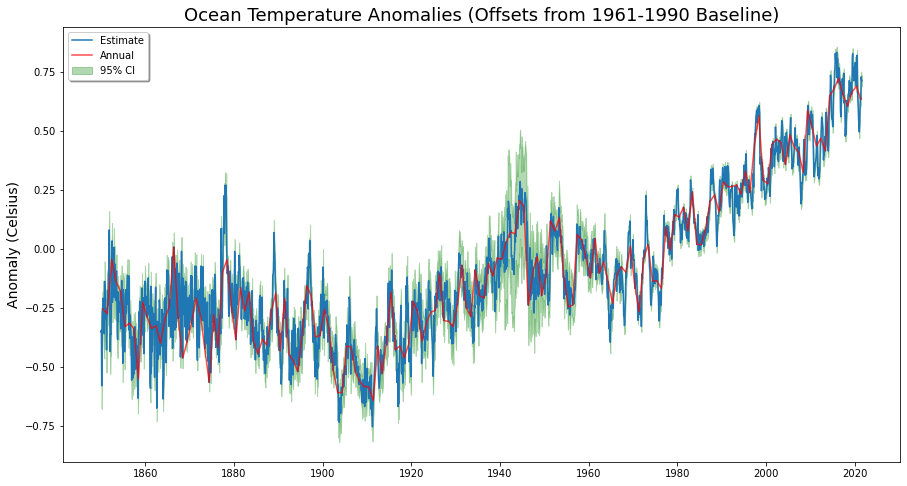

In [199]:
fig = plt.figure(figsize=(15, 8))  
plt.plot(SeaTemp.index, SeaTemp.anomaly, label='Estimate')
plt.fill_between(SeaTemp.index, (SeaTemp.lower_bound_95pct), (SeaTemp.upper_bound_95pct), color='g', alpha=0.3, label="95% CI")
plt.plot(SeaTempAnnual.index, SeaTempAnnual.anomaly, label='Annual', color='red', alpha=0.7)
plt.ylabel('Anomaly (Celsius)', fontsize=14)
plt.legend(shadow=True)
plt.title('Ocean Temperature Anomalies (Offsets from 1961-1990 Baseline)', fontsize=18)
plt.show()

Because we are working with ocean temperature deviations from monthly averages, rather than actual temperatures, there is much less variation here than in the land temperatures.  This allows us to see the global warming trend more clearly in this graph. 

The noise is on the order of 0.5 degrees C, and the move is less than 1 degree, mostly occurring since about 1975.  Interestingly, there was an upward move of about 0.75 degrees from 1910 to 1945, which settled back to the baseline of 0.

# 5. Sea Ice Extent

The [National Snow and Ice Data Center](https://nsidc.org/data/G02135/versions/3) curates data on sea ice extent, glaciers, ice sheets and related frozen features, available at https://nsidc.org/data/seaice_index/archives

This is ice in the sea, so its contribution to global warming is that sea water is much darker and absorbs more sunlight than ice.  Also ice takes a good deal of thermal energy to actually melt.  The more ice that has already melted, the more water there is to heat up directly.  

In [178]:
ArcticIce = pd.read_csv('../RawData/N_seaice_extent_daily_v3.0.csv')
AntarctIce = pd.read_csv('../RawData/S_seaice_extent_daily_v3.0.csv')
ArcticIce

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
...,...,...,...,...,...,...
14055,2021,10,27,8.077,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2021.10.26/nt_202...
14056,2021,10,28,8.132,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2021.10.27/nt_202...
14057,2021,10,29,8.220,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2021.10.28/nt_202...
14058,2021,10,30,8.353,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2021.10.29/nt_202...


In [179]:
AntarctIce

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,17.624,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,17.803,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,17.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,17.527,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
...,...,...,...,...,...,...
14055,2021,10,27,17.040,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2021.10.26/nt_202...
14056,2021,10,28,17.003,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2021.10.27/nt_202...
14057,2021,10,29,16.914,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2021.10.28/nt_202...
14058,2021,10,30,16.806,0.000,['/ecs/DP1/PM/NSIDC-0081.001/2021.10.29/nt_202...


## 5.1 Prune excess data

* Resample from daily to monthly.  Also resample an annual dataframe.
* The Missing column is always 0 or very near 0.  
* We don't need the link to NSIDC's source data.  
* Drop the description row.
* Strip leading spaces from column names.

In [180]:
ArcticIce.drop(index=0, inplace=True)
ArcticIce.columns = ArcticIce.columns.str.strip()
ArcticIce.insert(3, 'Date', pd.DatetimeIndex(ArcticIce.Year + ArcticIce.Month + ArcticIce.Day))
ArcticIce.set_index('Date', inplace=True)
ArcticIce = ArcticIce[['Extent']].astype(float)
ArcIceAnnual = ArcticIce.resample('A').mean()
ArcticIce = ArcticIce.resample('M').mean()


In [185]:
ArcticIce.head(12)

,Extent
Date,
1978-10-31,10.402667
1978-11-30,11.645133
1978-12-31,13.667063
1979-01-31,15.414000
1979-02-28,16.175286
1979-03-31,16.341938
1979-04-30,15.446800
1979-05-31,13.856867
1979-06-30,12.530000


In [182]:
ArcIceAnnual.tail()

,Extent
Date,
2017-12-31,10.392701
2018-12-31,10.355041
2019-12-31,10.200984
2020-12-31,10.149869
2021-12-31,10.426136


## 5.2 Antarctic Ocean Ice

Do the same for ice in the Southern Ocean around Antarctica.

In [183]:
AntarctIce.drop(index=0, inplace=True)
AntarctIce.columns = AntarctIce.columns.str.strip()
AntarctIce.insert(3, 'Date', pd.DatetimeIndex(AntarctIce.Year + AntarctIce.Month + AntarctIce.Day))
AntarctIce.set_index('Date', inplace=True)
AntarctIce = AntarctIce[['Extent']].astype(float)
AntIceAnnual = AntarctIce.resample('A').mean()
AntarctIce = AntarctIce.resample('M').mean()

In [187]:
AntarctIce.head(12)

,Extent
Date,
1978-10-31,17.699000
1978-11-30,15.896400
1978-12-31,10.395250
1979-01-31,5.402200
1979-02-28,3.141071
1979-03-31,3.999312
1979-04-30,7.485533
1979-05-31,10.826667
1979-06-30,14.187000


## 5.3 Our Sea Ice Extent data

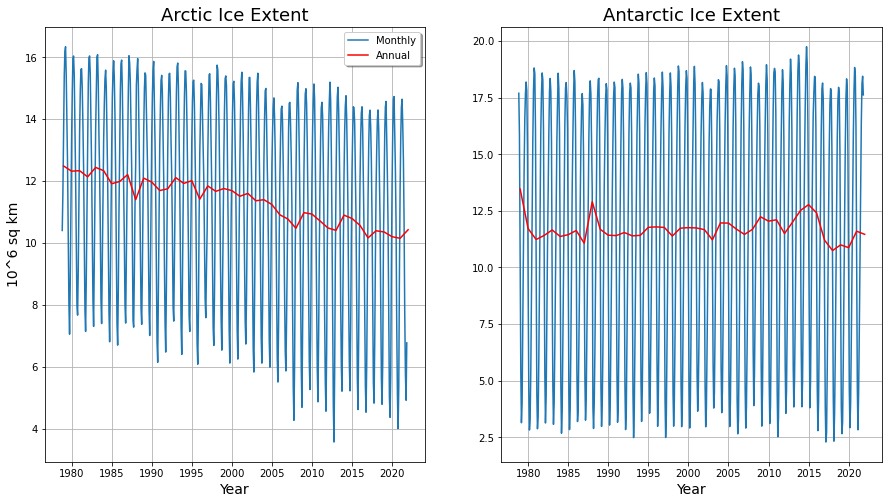

In [188]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))  

ax[0].grid(True); ax[1].grid(True)
ax[0].plot(ArcticIce.index, ArcticIce.Extent, label='Monthly')
ax[0].plot(ArcIceAnnual.index, ArcIceAnnual.Extent, c='red', label='Annual')

ax[1].plot(AntarctIce.index, AntarctIce.Extent)
ax[1].plot(AntIceAnnual.index, AntIceAnnual.Extent, c='red', label='Annual')

ax[0].set_title('Arctic Ice Extent', fontsize=18)
ax[1].set_title('Antarctic Ice Extent', fontsize=18)
ax[0].set_ylabel('10^6 sq km', fontsize=14)
ax[0].set_xlabel('Year', fontsize=14)
ax[1].set_xlabel('Year', fontsize=14)
ax[0].legend(loc='best', shadow=True)
plt.show();

Like the Land Temperatures, there is a lot more variation within each year than there has been in the annual average melt.  Who knew that so much polar ice melted and refroze every year?   

According to this data about half the 16,000,000 square kilometers of Arctic ice melted and refroze each year in the 1980s.  The seas around Antarctica lost and regained about 5/6ths, or 83% of their ice every year in the 1980s.  

Please note that this is sea ice in the Arctic Ocean and the seas around Antarctica.  Ice takes up more space than water, so the fact this is melting should actually help offset the sea level rise, except that the melting helps warm the seas.  This is not tracking the melting of glaciers on Greenland, Canada, Russia and Antarctica.  It is this ice on the land masses which causes sea level to rise around the world when it melts and runs into rivers and seas, because that process is a net addition to the H2O in the oceans.

The annualized data show that the Arctic ice average has shrunk from 12.5 M sq km to 10.5 M sq km, a reduction of about 16%.  

The Antarctic maintained an average of close to 12 M sq km until 2016, The last 5 years it has slipped 11 M, but is back up to 11.5 M this year.  There is a good deal of fluctuation in the Antarctic annual average, but unfortunately it looks like it is beginning to slip.

This picture certainly does not look as dire at this point as I believed from news reports.  The biggest lesson learned from this data is that yes, the Antarctic sea ice almost completely disappears, but it does that every year and then comes back!

## 6. Save the data!

In [195]:
Emissions.to_csv('../Data/GasEmissions.csv')
Modern.to_csv('../Data/EmissionsSince1958.csv')
CO2.to_csv('../Data/CO2inAtmos.csv')
CO2_Ann.to_csv('../Data/CO2Annual.csv')
LandTemp.to_csv('../Data/LandTemp.csv')
LandTempAnnual.to_csv('../Data/LandTempAnnual.csv')
SeaTemp.to_csv('../Data/SeaTemp.csv')
SeaTempAnnual.to_csv('../Data/SeaTempAnnual.csv')
ArcticIce.to_csv('../Data/ArcIce.csv')
ArcIceAnnual.to_csv('../Data/ArcIceAnnual.csv')
AntarctIce.to_csv('../Data/AntIce.csv')
AntIceAnnual.to_csv('../Data/AntIceAnnual.csv')